In [1]:
# Common imports
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import Imputer
import datetime
from scipy import sparse
from scipy.sparse import hstack, csr_matrix

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
import pandas as pd
train_data = pd.read_csv("./datasets/data_train.csv")
test_data = pd.read_csv("./datasets/data_test.csv")
tfidvectors_train = sparse.load_npz("tfidvectors_train.npz")
tfidvectors_test = sparse.load_npz("tfidvectors_test.npz")

(train_data.shape, test_data.shape)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((182080, 181), (78035, 180))

In [3]:
list(train_data.columns)

['id',
 'teacher_id',
 'project_submitted_datetime',
 'project_subject_categories',
 'project_subject_subcategories',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_essay_3',
 'project_essay_4',
 'project_resource_summary',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'cat_school_state_AK',
 'cat_school_state_AL',
 'cat_school_state_AR',
 'cat_school_state_AZ',
 'cat_school_state_CA',
 'cat_school_state_CO',
 'cat_school_state_CT',
 'cat_school_state_DC',
 'cat_school_state_DE',
 'cat_school_state_FL',
 'cat_school_state_GA',
 'cat_school_state_HI',
 'cat_school_state_IA',
 'cat_school_state_ID',
 'cat_school_state_IL',
 'cat_school_state_IN',
 'cat_school_state_KS',
 'cat_school_state_KY',
 'cat_school_state_LA',
 'cat_school_state_MA',
 'cat_school_state_MD',
 'cat_school_state_ME',
 'cat_school_state_MI',
 'cat_school_state_MN',
 'cat_school_state_MO',
 'cat_school_state_MS',
 'cat_school_state_MT',
 'cat_school_state_NC',
 'cat_scho

In [4]:
cat_features  = ['cat_school_state_AK',
                 'cat_school_state_AL',
                 'cat_school_state_AR',
                 'cat_school_state_AZ',
                 'cat_school_state_CA',
                 'cat_school_state_CO',
                 'cat_school_state_CT',
                 'cat_school_state_DC',
                 'cat_school_state_DE',
                 'cat_school_state_FL',
                 'cat_school_state_GA',
                 'cat_school_state_HI',
                 'cat_school_state_IA',
                 'cat_school_state_ID',
                 'cat_school_state_IL',
                 'cat_school_state_IN',
                 'cat_school_state_KS',
                 'cat_school_state_KY',
                 'cat_school_state_LA',
                 'cat_school_state_MA',
                 'cat_school_state_MD',
                 'cat_school_state_ME',
                 'cat_school_state_MI',
                 'cat_school_state_MN',
                 'cat_school_state_MO',
                 'cat_school_state_MS',
                 'cat_school_state_MT',
                 'cat_school_state_NC',
                 'cat_school_state_ND',
                 'cat_school_state_NE',
                 'cat_school_state_NH',
                 'cat_school_state_NJ',
                 'cat_school_state_NM',
                 'cat_school_state_NV',
                 'cat_school_state_NY',
                 'cat_school_state_OH',
                 'cat_school_state_OK',
                 'cat_school_state_OR',
                 'cat_school_state_PA',
                 'cat_school_state_RI',
                 'cat_school_state_SC',
                 'cat_school_state_SD',
                 'cat_school_state_TN',
                 'cat_school_state_TX',
                 'cat_school_state_UT',
                 'cat_school_state_VA',
                 'cat_school_state_VT',
                 'cat_school_state_WA',
                 'cat_school_state_WI',
                 'cat_school_state_WV',
                 'cat_school_state_WY',
                 'cat_project_grade_Grades 3-5',
                 'cat_project_grade_Grades 6-8',
                 'cat_project_grade_Grades 9-12',
                 'cat_project_grade_Grades PreK-2',
                 'cat_teacher_prefix_Dr.',
                 'cat_teacher_prefix_Mr.',
                 'cat_teacher_prefix_Mrs.',
                 'cat_teacher_prefix_Ms.',
                 'cat_teacher_prefix_Teacher',
                 'cat_month_created_1',
                 'cat_month_created_10',
                 'cat_month_created_11',
                 'cat_month_created_12',
                 'cat_month_created_2',
                 'cat_month_created_3',
                 'cat_month_created_4',
                 'cat_month_created_5',
                 'cat_month_created_6',
                 'cat_month_created_7',
                 'cat_month_created_8',
                 'cat_month_created_9',
                 'cat_weekday_created_0',
                 'cat_weekday_created_1',
                 'cat_weekday_created_2',
                 'cat_weekday_created_3',
                 'cat_weekday_created_4',
                 'cat_weekday_created_5',
                 'cat_weekday_created_6',
                 'cat_hour_created_0',
                 'cat_hour_created_1',
                 'cat_hour_created_10',
                 'cat_hour_created_11',
                 'cat_hour_created_12',
                 'cat_hour_created_13',
                 'cat_hour_created_14',
                 'cat_hour_created_15',
                 'cat_hour_created_16',
                 'cat_hour_created_17',
                 'cat_hour_created_18',
                 'cat_hour_created_19',
                 'cat_hour_created_2',
                 'cat_hour_created_20',
                 'cat_hour_created_21',
                 'cat_hour_created_22',
                 'cat_hour_created_23',
                 'cat_hour_created_3',
                 'cat_hour_created_4',
                 'cat_hour_created_5',
                 'cat_hour_created_6',
                 'cat_hour_created_7',
                 'cat_hour_created_8',
                 'cat_hour_created_9',
                 'cat_project_subject_Applied Learning',
                 'cat_project_subject_Applied Learning, Health & Sports',
                 'cat_project_subject_Applied Learning, History & Civics',
                 'cat_project_subject_Applied Learning, Literacy & Language',
                 'cat_project_subject_Applied Learning, Math & Science',
                 'cat_project_subject_Applied Learning, Music & The Arts',
                 'cat_project_subject_Applied Learning, Special Needs',
                 'cat_project_subject_Applied Learning, Warmth, Care & Hunger',
                 'cat_project_subject_Health & Sports',
                 'cat_project_subject_Health & Sports, Applied Learning',
                 'cat_project_subject_Health & Sports, History & Civics',
                 'cat_project_subject_Health & Sports, Literacy & Language',
                 'cat_project_subject_Health & Sports, Math & Science',
                 'cat_project_subject_Health & Sports, Music & The Arts',
                 'cat_project_subject_Health & Sports, Special Needs',
                 'cat_project_subject_Health & Sports, Warmth, Care & Hunger',
                 'cat_project_subject_History & Civics',
                 'cat_project_subject_History & Civics, Applied Learning',
                 'cat_project_subject_History & Civics, Health & Sports',
                 'cat_project_subject_History & Civics, Literacy & Language',
                 'cat_project_subject_History & Civics, Math & Science',
                 'cat_project_subject_History & Civics, Music & The Arts',
                 'cat_project_subject_History & Civics, Special Needs',
                 'cat_project_subject_History & Civics, Warmth, Care & Hunger',
                 'cat_project_subject_Literacy & Language',
                 'cat_project_subject_Literacy & Language, Applied Learning',
                 'cat_project_subject_Literacy & Language, Health & Sports',
                 'cat_project_subject_Literacy & Language, History & Civics',
                 'cat_project_subject_Literacy & Language, Math & Science',
                 'cat_project_subject_Literacy & Language, Music & The Arts',
                 'cat_project_subject_Literacy & Language, Special Needs',
                 'cat_project_subject_Literacy & Language, Warmth, Care & Hunger',
                 'cat_project_subject_Math & Science',
                 'cat_project_subject_Math & Science, Applied Learning',
                 'cat_project_subject_Math & Science, Health & Sports',
                 'cat_project_subject_Math & Science, History & Civics',
                 'cat_project_subject_Math & Science, Literacy & Language',
                 'cat_project_subject_Math & Science, Music & The Arts',
                 'cat_project_subject_Math & Science, Special Needs',
                 'cat_project_subject_Math & Science, Warmth, Care & Hunger',
                 'cat_project_subject_Music & The Arts',
                 'cat_project_subject_Music & The Arts, Applied Learning',
                 'cat_project_subject_Music & The Arts, Health & Sports',
                 'cat_project_subject_Music & The Arts, History & Civics',
                 'cat_project_subject_Music & The Arts, Special Needs',
                 'cat_project_subject_Music & The Arts, Warmth, Care & Hunger',
                 'cat_project_subject_Special Needs',
                 'cat_project_subject_Special Needs, Health & Sports',
                 'cat_project_subject_Special Needs, Music & The Arts',
                 'cat_project_subject_Special Needs, Warmth, Care & Hunger',
                 'cat_project_subject_Warmth, Care & Hunger',
                ]

num_features = ['teacher_number_of_previously_posted_projects',
                'mean_cost',
                'total_cost',
                'unique_items',
                'total_quantity',
                'len_project_subject_categories',
                'words_project_subject_categories',
                'len_project_subject_subcategories',
                'words_project_subject_subcategories',
                'len_project_title',
                'words_project_title'
               ]
print(len(cat_features),len(num_features))

(154, 11)


In [5]:
features = cat_features + num_features
len(features)

165

In [6]:
X_full = csr_matrix(hstack([train_data[features].values, tfidvectors_train]))
X_test = csr_matrix(hstack([test_data[features].values, tfidvectors_test]))

In [7]:
from sklearn.model_selection import train_test_split

# Split stratified to conserve label proportions in train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_full, train_data["project_is_approved"],
                                                    stratify=train_data["project_is_approved"], 
                                                    test_size=0.20)

In [8]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

((145664, 229), (145664,), (36416, 229), (36416,))


In [9]:
X_train = X_train.todense()
X_val = X_val.todense()

In [10]:
X_train

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.60922061],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.59493123],
        [0.        , 0.        , 0.        , ..., 0.        , 0.45222642,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

# Models

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_predict
import lightgbm
from lightgbm import LGBMClassifier

In [ ]:
classifiers = {
    'LGB' : LGBMClassifier(boosting_type='gbdt',
                           objective='binary',
                           n_estimators = 600,
                           learning_rate = 0.01,
                           max_depth = 20,
                           min_data_in_leaf = 100
                       #num_class=9,early_stopping = 50,num_iteration=10000,num_leaves=31,
                       #is_enable_sparse='true',tree_learner='data',min_data_in_leaf=600,max_depth=4,
                       #learning_rate=0.01,  max_bin=255, subsample_for_bin=50000, 
                       #min_split_gain=5, min_child_weight=5, min_child_samples=10, subsample=0.995, 
                       #subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       #reg_lambda=0, seed=0, nthread=-1, silent=True
                          ),
    'XGB' : XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 7),
    'RFC' : RandomForestClassifier(n_estimators = 500, 
                                   min_samples_split = 100,
                                   min_samples_leaf = 70,
                                   max_depth = 20,
                                   max_features = 40
                                  ),
    
    
    'KNN' : KNeighborsClassifier(n_neighbors = 200, p=1),
    'LogisticRegression' : LogisticRegression(C=0.01, penalty = 'l1'),    
    #'SVC' : SVC(probability=True,max_iter=100),
    #'GNB' : GaussianNB(),
    #'MLP' : MLPClassifier(),

    #'DTC' : DecisionTreeClassifier(),
}

fpr={}
tpr={}


for i,c in classifiers.items():
    print ('fitting -- ', i ,) 
    score = cross_val_score(c, X_train, y_train, cv=5, scoring="roc_auc",n_jobs=4)
    c.fit(X_train, y_train)
    y_pred = c.predict_proba(X_val)[:, 1]
    fpr[i],tpr[i], _ = roc_curve(y_val, y_pred)
    print (i, score)

('fitting -- ', 'LGB')
('LGB', array([0.71721299, 0.70613643, 0.70337458, 0.70431305, 0.70199223]))
('fitting -- ', 'RFC')


## Previous trainings:

('fitting -- ', 'KNN')
('KNN', array([0.68299594, 0.67971493, 0.67040683]))

('fitting -- ', 'RFC')
n_estimators = 500,
min_samples_split = 100,
min_samples_leaf = 70,
max_depth = 20,
max_features = 40
                                   
('RFC', array([0.71544482, 0.70562751, 0.70248537, 0.70256983, 0.70003428]))
('RFC', array([0.70026585, 0.69378254, 0.68892217]))

('fitting -- ', 'LogisticRegression')
('LogisticRegression', array([0.68539305, 0.67463624, 0.67985317, 0.67664737, 0.67361481]))
('LogisticRegression', array([0.6796264 , 0.68027167, 0.67315418]))

('fitting -- ', 'XGB')
('XGB', array([0.7108579 , 0.70452663, 0.70012426]))

('fitting -- ', 'LGB')
boosting_type='gbdt',
objective='binary',
n_estimators = 600,
learning_rate = 0.01,
max_depth = 20,
min_data_in_leaf = 100
                           
('LGB', array([0.71721299, 0.70613643, 0.70337458, 0.70431305, 0.70199223]))
('LGB', array([0.71042279, 0.7002675 , 0.69949267, 0.69827134, 0.69634005]))

('fitting -- ', 'GNB')
('GNB', array([0.57326004, 0.57308017, 0.57311777]))

('fitting -- ', 'MLP')
('MLP', array([0.63533981, 0.67674316, 0.68559269]))



('Saving figure', '2-roc_curve-lgb')


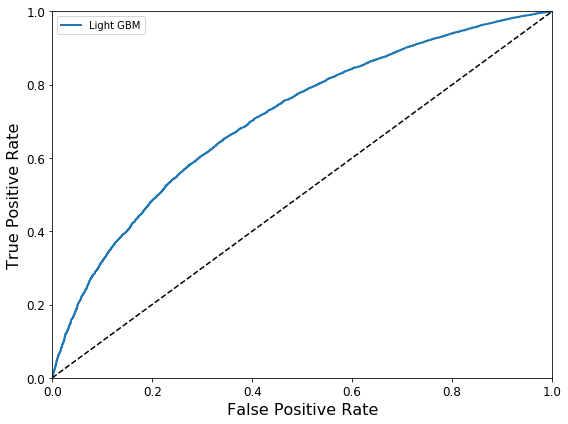

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

plt.figure(figsize=(8, 6))
#plot_roc_curve(fpr["KNN"], tpr["KNN"], label="K Nearest Neighbors")
#plot_roc_curve(fpr["GNB"], tpr["GNB"], label="Gaussian Naive Bayes")
#plot_roc_curve(fpr["MLP"], tpr["MLP"], label="Multi Layer Perceptron")
plot_roc_curve(fpr["LGB"], tpr["LGB"], label="Light GBM")
#plot_roc_curve(fpr["SVC"], tpr["SVC"], label="Support Vectors")
#plot_roc_curve(fpr["XGB"], tpr["XGB"], label="XGradient Boost")
#plot_roc_curve(fpr["DTC"], tpr["DTC"], label="Decision Tree")
#plot_roc_curve(fpr["RFC"], tpr["RFC"], label="Random forest")
#plot_roc_curve(fpr["LogisticRegression"], tpr["LogisticRegression"], label="LogisticRegression")
save_fig("2-roc_curve-lgb")
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score

for clf in (classifiers["RFC"], 
            classifiers["KNN"], 
            classifiers["XGB"], 
            classifiers["GNB"], 
            classifiers["MLP"], 
            #classifiers["SVC"], 
            classifiers["LogisticRegression"], 
            #classifiers["DTC"]
           ):
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, roc_auc_score(y_val, y_pred))

('RandomForestClassifier', 0.5)


KeyboardInterrupt: 

# Optimization

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

## Random Forest

In [16]:
rf_param_grid = [
    {#'n_estimators': [70, 80, 90], 
     #'max_features': [4, 6, 8], 
     #'max_depth': [15, 20, 25],
     #'min_samples_split': [1, 10],
     #'min_samples_leaf': [1, 10],
     
     #'n_estimators': [200,300,500], 
     'n_estimators': [200,300,500], 
     'max_depth': [10],
     #'max_features': [40], 
     #'max_depth': [10,30,50],
     #'min_samples_leaf': [10],
     'min_samples_split': [10,20],
     #'criterion': ["gini"]
    }
  ]
"""                               
 grid best
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
 rdn best
{'max_depth': 45,
 'max_features': 43,
 'min_samples_leaf': 65,
 'min_samples_split': 12,
 'n_estimators': 320}
"""
rf_clf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3,scoring="roc_auc",refit=True, n_jobs=1,
                           return_train_score=True,verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] min_samples_split=10, n_estimators=200, max_depth=10 ............
[CV]  min_samples_split=10, n_estimators=200, max_depth=10, total=  28.9s
[CV] min_samples_split=10, n_estimators=200, max_depth=10 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.3s remaining:    0.0s


[CV]  min_samples_split=10, n_estimators=200, max_depth=10, total=  30.1s
[CV] min_samples_split=10, n_estimators=200, max_depth=10 ............
[CV]  min_samples_split=10, n_estimators=200, max_depth=10, total=  31.4s
[CV] min_samples_split=10, n_estimators=300, max_depth=10 ............
[CV]  min_samples_split=10, n_estimators=300, max_depth=10, total=  45.5s
[CV] min_samples_split=10, n_estimators=300, max_depth=10 ............
[CV]  min_samples_split=10, n_estimators=300, max_depth=10, total=  44.2s
[CV] min_samples_split=10, n_estimators=300, max_depth=10 ............
[CV]  min_samples_split=10, n_estimators=300, max_depth=10, total=  44.3s
[CV] min_samples_split=10, n_estimators=500, max_depth=10 ............
[CV]  min_samples_split=10, n_estimators=500, max_depth=10, total= 1.2min
[CV] min_samples_split=10, n_estimators=500, max_depth=10 ............
[CV]  min_samples_split=10, n_estimators=500, max_depth=10, total= 1.2min
[CV] min_samples_split=10, n_estimators=500, max_depth=1

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 15.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [200, 300, 500], 'min_samples_split': [10, 20], 'max_depth': [10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [17]:
rf_grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}

In [18]:
cvres = rf_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.6951362054513108, {'min_samples_split': 10, 'n_estimators': 200, 'max_depth': 10})
(0.6953872379904315, {'min_samples_split': 10, 'n_estimators': 300, 'max_depth': 10})
(0.6954536426966826, {'min_samples_split': 10, 'n_estimators': 500, 'max_depth': 10})
(0.69502110740016, {'min_samples_split': 20, 'n_estimators': 200, 'max_depth': 10})
(0.695236303081846, {'min_samples_split': 20, 'n_estimators': 300, 'max_depth': 10})
(0.6953450113788859, {'min_samples_split': 20, 'n_estimators': 500, 'max_depth': 10})


In [21]:
param_distribs = {
        'n_estimators': randint(low=50, high=500),
        'max_features': randint(low=20, high=50),
        'max_depth': randint(low=10, high=50),
        'min_samples_split': randint(low=10, high=200),
        'min_samples_leaf': randint(low=10, high=200),    
    }
"""
 
{'max_depth': 45,
 'max_features': 43,
 'min_samples_leaf': 65,
 'min_samples_split': 12,
 'n_estimators': 320}
"""
rf_clf = RandomForestClassifier(criterion='gini')
rf_rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,refit=False, n_jobs=4,
                                n_iter=10, cv=3, scoring='roc_auc',verbose=2)
rf_rnd_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_features=49, min_samples_split=141, n_estimators=301, max_depth=41, min_samples_leaf=180 
[CV] max_features=49, min_samples_split=141, n_estimators=301, max_depth=41, min_samples_leaf=180 
[CV] max_features=49, min_samples_split=141, n_estimators=301, max_depth=41, min_samples_leaf=180 
[CV] max_features=29, min_samples_split=116, n_estimators=301, max_depth=29, min_samples_leaf=85 
[CV]  max_features=29, min_samples_split=116, n_estimators=301, max_depth=29, min_samples_leaf=85, total= 2.8min
[CV] max_features=29, min_samples_split=116, n_estimators=301, max_depth=29, min_samples_leaf=85 
[CV]  max_features=49, min_samples_split=141, n_estimators=301, max_depth=41, min_samples_leaf=180, total= 3.7min
[CV] max_features=29, min_samples_split=116, n_estimators=301, max_depth=29, min_samples_leaf=85 
[CV]  max_features=49, min_samples_split=141, n_estimators=301, max_depth=41, min_samples_leaf=180, total= 3.8min
[CV]  m

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 21.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=4,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0c45908090>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0c459085d0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0c45908350>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0c45908650>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen obje

In [22]:
rf_rnd_search.best_params_

{'max_depth': 45,
 'max_features': 43,
 'min_samples_leaf': 65,
 'min_samples_split': 12,
 'n_estimators': 320}

In [23]:
cvres = rf_rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.703751274011472, {'max_features': 49, 'min_samples_split': 141, 'n_estimators': 301, 'max_depth': 41, 'min_samples_leaf': 180})
(0.7033273987500399, {'max_features': 29, 'min_samples_split': 116, 'n_estimators': 301, 'max_depth': 29, 'min_samples_leaf': 85})
(0.704307638381162, {'max_features': 42, 'min_samples_split': 112, 'n_estimators': 122, 'max_depth': 46, 'min_samples_leaf': 82})
(0.7040059813360441, {'max_features': 46, 'min_samples_split': 19, 'n_estimators': 205, 'max_depth': 31, 'min_samples_leaf': 142})
(0.7034879632282824, {'max_features': 29, 'min_samples_split': 172, 'n_estimators': 208, 'max_depth': 36, 'min_samples_leaf': 11})
(0.7047649178262636, {'max_features': 43, 'min_samples_split': 12, 'n_estimators': 320, 'max_depth': 45, 'min_samples_leaf': 65})
(0.7041139464825946, {'max_features': 34, 'min_samples_split': 169, 'n_estimators': 378, 'max_depth': 40, 'min_samples_leaf': 68})
(0.7033887701860477, {'max_features': 47, 'min_samples_split': 106, 'n_estimators': 7

## Light GBM

In [35]:
lgb_param_grid = [
    {
     'n_estimators': [400,500,600,700], 
     'learning_rate': [0.01],
     #'max_features': [40], 
     'max_depth': [10, 20, 30],
     'min_data_in_leaf': [100],
     #'criterion': ["gini"]
    }
  ]
"""                               
 grid best
{'learning_rate': 0.01,
 'max_depth': 20,
 'min_data_in_leaf': 100,
 'n_estimators': 600}
"""
lgb_clf = LGBMClassifier(boosting_type='gbdt', objective='binary')
                       #num_class=9,,num_iteration=10000,num_leaves=31,
                       #is_enable_sparse='true',tree_learner='data',min_data_in_leaf=600,max_depth=4,
                       #learning_rate=0.01,  max_bin=255, subsample_for_bin=50000, 
                       #min_split_gain=5, min_child_weight=5, min_child_samples=10, subsample=0.995, 
                       #subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       #reg_lambda=0, seed=0, nthread=-1, silent=True
lgb_grid_search = GridSearchCV(lgb_clf, lgb_param_grid, cv=3,scoring="roc_auc",refit=False, n_jobs=4,
                           return_train_score=True,verbose=2)
lgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] n_estimators=400, learning_rate=0.01, max_depth=10, min_data_in_leaf=100 
[CV] n_estimators=400, learning_rate=0.01, max_depth=10, min_data_in_leaf=100 
[CV] n_estimators=400, learning_rate=0.01, max_depth=10, min_data_in_leaf=100 
[CV] n_estimators=500, learning_rate=0.01, max_depth=10, min_data_in_leaf=100 
[CV]  n_estimators=400, learning_rate=0.01, max_depth=10, min_data_in_leaf=100, total=  30.9s
[CV] n_estimators=500, learning_rate=0.01, max_depth=10, min_data_in_leaf=100 
[CV]  n_estimators=400, learning_rate=0.01, max_depth=10, min_data_in_leaf=100, total=  30.3s
[CV] n_estimators=500, learning_rate=0.01, max_depth=10, min_data_in_leaf=100 
[CV]  n_estimators=400, learning_rate=0.01, max_depth=10, min_data_in_leaf=100, total=  33.9s
[CV] n_estimators=600, learning_rate=0.01, max_depth=10, min_data_in_leaf=100 
[CV]  n_estimators=500, learning_rate=0.01, max_depth=10, min_data_in_leaf=100, total=  45.5s
[CV] n_est

[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_estimators': [400, 500, 600, 700], 'learning_rate': [0.01], 'max_depth': [10, 20, 30], 'min_data_in_leaf': [100]}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [36]:
lgb_grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 20,
 'min_data_in_leaf': 100,
 'n_estimators': 600}

In [37]:
cvres = lgb_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if (params == lgb_grid_search.best_params_):print("BEST")
    print(mean_score, params)

(0.7042640410005863, {'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 10, 'min_data_in_leaf': 100})
(0.7050201999207812, {'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 10, 'min_data_in_leaf': 100})
(0.7053753427920695, {'n_estimators': 600, 'learning_rate': 0.01, 'max_depth': 10, 'min_data_in_leaf': 100})
(0.7053763949561687, {'n_estimators': 700, 'learning_rate': 0.01, 'max_depth': 10, 'min_data_in_leaf': 100})
(0.7043027690735182, {'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 20, 'min_data_in_leaf': 100})
(0.7052161600898108, {'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 20, 'min_data_in_leaf': 100})
BEST
(0.7055280650876261, {'n_estimators': 600, 'learning_rate': 0.01, 'max_depth': 20, 'min_data_in_leaf': 100})
(0.7055105838058969, {'n_estimators': 700, 'learning_rate': 0.01, 'max_depth': 20, 'min_data_in_leaf': 100})
(0.7043027690735182, {'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 30, 'min_data_in_leaf': 100})
(0.70521616008

## KNearest Neighbors

In [72]:
knn_param_grid = [
    {'n_neighbors': [200], 
     'p': [1,2]
    }
  ]
"""
grid
{u'n_neighbors': 200, u'p': 1}
"""
knn_clf = KNeighborsClassifier()
    
knn_grid_search = GridSearchCV(knn_clf, 
                               knn_param_grid, 
                               cv=3,
                               scoring="roc_auc",
                               return_train_score=True, n_jobs=4,
                               verbose=2)
knn_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_neighbors=200, p=1 ............................................
[CV] n_neighbors=200, p=1 ............................................
[CV] n_neighbors=200, p=1 ............................................
[CV] n_neighbors=200, p=2 ............................................
[CV] ............................. n_neighbors=200, p=2, total= 1.1min
[CV] n_neighbors=200, p=2 ............................................
[CV] ............................. n_neighbors=200, p=1, total= 1.7min
[CV] n_neighbors=200, p=2 ............................................
[CV] ............................. n_neighbors=200, p=1, total= 1.8min
[CV] ............................. n_neighbors=200, p=1, total= 1.8min


[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:  5.1min remaining:  5.1min


[CV] ............................. n_neighbors=200, p=2, total= 1.1min
[CV] ............................. n_neighbors=200, p=2, total=  55.9s


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_neighbors': [200], 'p': [1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [ ]:
knn_grid_search.best_params_

In [74]:
cvres = knn_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.6852949704409353, {'n_neighbors': 200, 'p': 1})
(0.6841955788242695, {'n_neighbors': 200, 'p': 2})


## Gradient Boost

In [39]:
xgb_param_grid = [
    {
     'learning_rate': [0.1,0.01], 
     #'n_estimators': [100], 
     'n_estimators': [200,300,500], 
     'max_depth': [5],
    }
  ]


"""
     'n_estimators': [100, 150,200], 
     'max_depth': [30,40,50],
 grid best
{'learning_rate': 0.1, 'n_estimators': 200}
"""
xgb_clf = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=3,scoring="roc_auc",refit=False, n_jobs=4,
                           return_train_score=True,verbose=2)
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_estimators=200, learning_rate=0.1, max_depth=5 ................
[CV] n_estimators=200, learning_rate=0.1, max_depth=5 ................
[CV] n_estimators=200, learning_rate=0.1, max_depth=5 ................
[CV] n_estimators=300, learning_rate=0.1, max_depth=5 ................
[CV] . n_estimators=200, learning_rate=0.1, max_depth=5, total= 3.2min
[CV] n_estimators=300, learning_rate=0.1, max_depth=5 ................
[CV] . n_estimators=200, learning_rate=0.1, max_depth=5, total= 3.2min
[CV] n_estimators=300, learning_rate=0.1, max_depth=5 ................
[CV] . n_estimators=200, learning_rate=0.1, max_depth=5, total= 3.3min
[CV] n_estimators=500, learning_rate=0.1, max_depth=5 ................
[CV] . n_estimators=300, learning_rate=0.1, max_depth=5, total= 4.5min
[CV] n_estimators=500, learning_rate=0.1, max_depth=5 ................
[CV] . n_estimators=300, learning_rate=0.1, max_depth=5, total= 4.1min
[CV] n_estimators

[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 23.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_estimators': [200, 300, 500], 'learning_rate': [0.1, 0.01], 'max_depth': [5]}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [40]:
xgb_grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [41]:
cvres = xgb_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.7026082930202219, {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5})
(0.7006159871217154, {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5})
(0.6968152146088946, {'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 5})
(0.7002132320429117, {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 5})
(0.7020180395832243, {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 5})
(0.704503095613778, {'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 5})


In [30]:
xgb_param_distribs = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': randint(low=50, high=500), 
    #'max_depth': randint(low=5, high=20),
    'max_depth': [10],
    }
"""
 
"""
xgb_clf = XGBClassifier()
xgb_rnd_search = RandomizedSearchCV(xgb_clf, param_distributions=xgb_param_distribs,refit=False, n_jobs=4,
                                n_iter=10, cv=3, scoring='roc_auc',verbose=2)
xgb_rnd_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=386, learning_rate=0.1, max_depth=89 ...............
[CV] n_estimators=386, learning_rate=0.1, max_depth=89 ...............
[CV] n_estimators=386, learning_rate=0.1, max_depth=89 ...............
[CV] n_estimators=244, learning_rate=0.1, max_depth=29 ...............
[CV]  n_estimators=244, learning_rate=0.1, max_depth=29, total=21.9min
[CV] n_estimators=244, learning_rate=0.1, max_depth=29 ...............
[CV]  n_estimators=244, learning_rate=0.1, max_depth=29, total=21.7min
[CV] n_estimators=244, learning_rate=0.1, max_depth=29 ...............
[CV]  n_estimators=386, learning_rate=0.1, max_depth=89, total=61.6min
[CV] n_estimators=582, learning_rate=0.1, max_depth=61 ...............
[CV]  n_estimators=386, learning_rate=0.1, max_depth=89, total=63.6min
[CV] n_estimators=582, learning_rate=0.1, max_depth=61 ...............
[CV]  n_estimators=386, learning_rate=0.1, max_depth=89, total=64.5min
[CV] n_estimator

KeyboardInterrupt: 

## Logistic Regression

In [30]:
lr_param_grid = [
    {'penalty': ['l1','l2'], 
     'C': [0.01]
     #'C': [0.1,1,10,100,500,1000,10000,100000]
    }
  ]
"""
grid
{'C': 0.01, 'penalty': 'l1'}"""
lr_clf = LogisticRegression()
    
lr_grid_search = GridSearchCV(lr_clf, 
                               lr_param_grid, 
                               cv=3,
                               scoring="roc_auc",
                               return_train_score=True, n_jobs=4,
                               verbose=2)
lr_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] penalty=l1, C=0.01 ..............................................
[CV] penalty=l1, C=0.01 ..............................................
[CV] penalty=l1, C=0.01 ..............................................
[CV] penalty=l2, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   2.8s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   2.7s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   3.3s


[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:    4.3s remaining:    4.3s


[CV] ............................... penalty=l2, C=0.01, total=   3.6s
[CV] ............................... penalty=l2, C=0.01, total=   2.4s
[CV] ............................... penalty=l2, C=0.01, total=   3.0s


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    6.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [31]:
lr_grid_search.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [32]:
cvres = lr_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.6757793742006123, {'penalty': 'l1', 'C': 0.01})
(0.6737299525772606, {'penalty': 'l2', 'C': 0.01})


# Voting Classifier


In [22]:
from sklearn.ensemble import VotingClassifier

In [24]:
voting_soft_clf = VotingClassifier(
    estimators=[
                #('knn', classifiers["KNN"]), 
                ('rf', classifiers["RFC"]), 
                ('lgb', classifiers["LGB"]), 
                ('xgb', classifiers["XGB"])
                #('gnb', classifiers["GNB"]), 
                #('mlp', classifiers["MLP"]), 
                #('svc', classifiers["SVC"]), 
                #('dtc', classifiers["DTC"]), 
                #('lr', classifiers["LogisticRegression"]), 
                ],
    voting='soft')
voting_soft_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=200, p=1,
           weights='uniform')), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [29]:
for clf in (classifiers["RFC"], 
            classifiers["KNN"], 
            classifiers["XGB"], 
            classifiers["GNB"], 
            classifiers["MLP"], 
            classifiers["LogisticRegression"], 
            voting_soft_clf):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

('RandomForestClassifier', 0.8476768453427065)
('KNeighborsClassifier', 0.8476219244288224)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('XGBClassifier', 0.8475120826010545)
('GaussianNB', 0.6783007469244289)
('MLPClassifier', 0.8476493848857645)
('LogisticRegression', 0.8465235061511424)
('VotingClassifier', 0.8457271528998243)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Kaggle submission file

In [51]:
# Get test features
#test_examples = test_data[features].copy()
test_examples = X_test

In [53]:
#test_examples.values
test_examples

<78035x229 sparse matrix of type '<type 'numpy.float64'>'
	with 1822161 stored elements in Compressed Sparse Row format>

In [54]:
classifiers['LGB'].predict_proba(test_examples)
#classifiers['XGB'].predict_proba(test_examples.values)
#voting_soft_clf.predict_proba(test_examples.values)

array([[0.06094392, 0.93905608],
       [0.1243715 , 0.8756285 ],
       [0.07723472, 0.92276528],
       ...,
       [0.22087557, 0.77912443],
       [0.04605385, 0.95394615],
       [0.2998014 , 0.7001986 ]])

In [55]:
probabilities = classifiers['LGB'].predict_proba(test_examples)[:,1]
#probabilities = classifiers['XGB'].predict_proba(test_examples.values)[:,1]
#probabilities = voting_soft_clf.predict_proba(test_examples.values)[:,1]
#probabilities = classifiers['XGB'].predict(test_examples)[:,1]

In [56]:
probabilities.mean()

0.8476207264750424

In [57]:
my_submission = pd.DataFrame({'id': test_data["id"], 'project_is_approved': probabilities})
print(my_submission.values)

[['p233245' 0.9390560811269518]
 ['p096795' 0.8756285021987146]
 ['p236235' 0.9227652837950622]
 ...
 ['p210728' 0.7791244338354367]
 ['p060531' 0.9539461497417397]
 ['p087783' 0.7001986004201379]]


In [58]:
my_submission.to_csv('my_submission_lgb.csv', index=False)

In [37]:
my_submission.shape

(78035, 2)

First score with RFC: 0.56406

Second score with XGB: 0.69273